In [1]:
from trig_poly import TrigPoly
import matplotlib.pyplot as plt
import numpy as np
from test_data import jittered_supports, uniform_supports
from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# set up a generic t-axis to use for plotting
N_TICKS = 1000
t = np.linspace(-0.5, 0.5, N_TICKS)

### Visualize dirichlet kernel for a few values of $f_c$

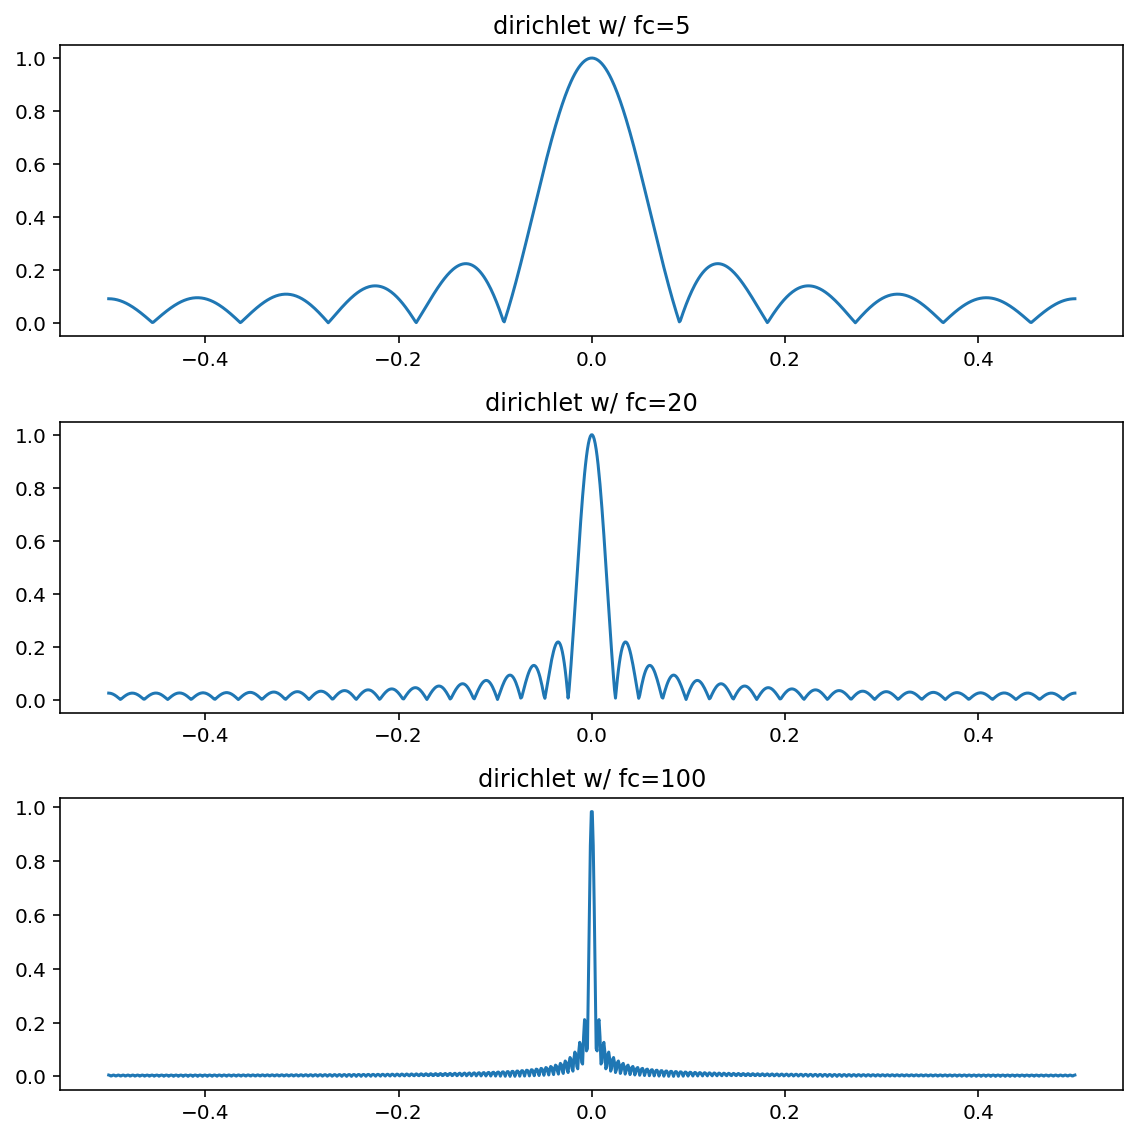

In [3]:
fig, axs = plt.subplots(3, 1, figsize=(8, 8))
fig.set_tight_layout(True)
for i, fc in enumerate([5, 20, 100]):
    axs[i].plot(t, np.abs(TrigPoly.dirichlet(fc).eval(t)))
    axs[i].set_title(f"dirichlet w/ fc={fc}")

### Visualize multi-dirichlet kernel for a few values of $f_c$, with gammas=[0.5,0.5] (squared kernel)

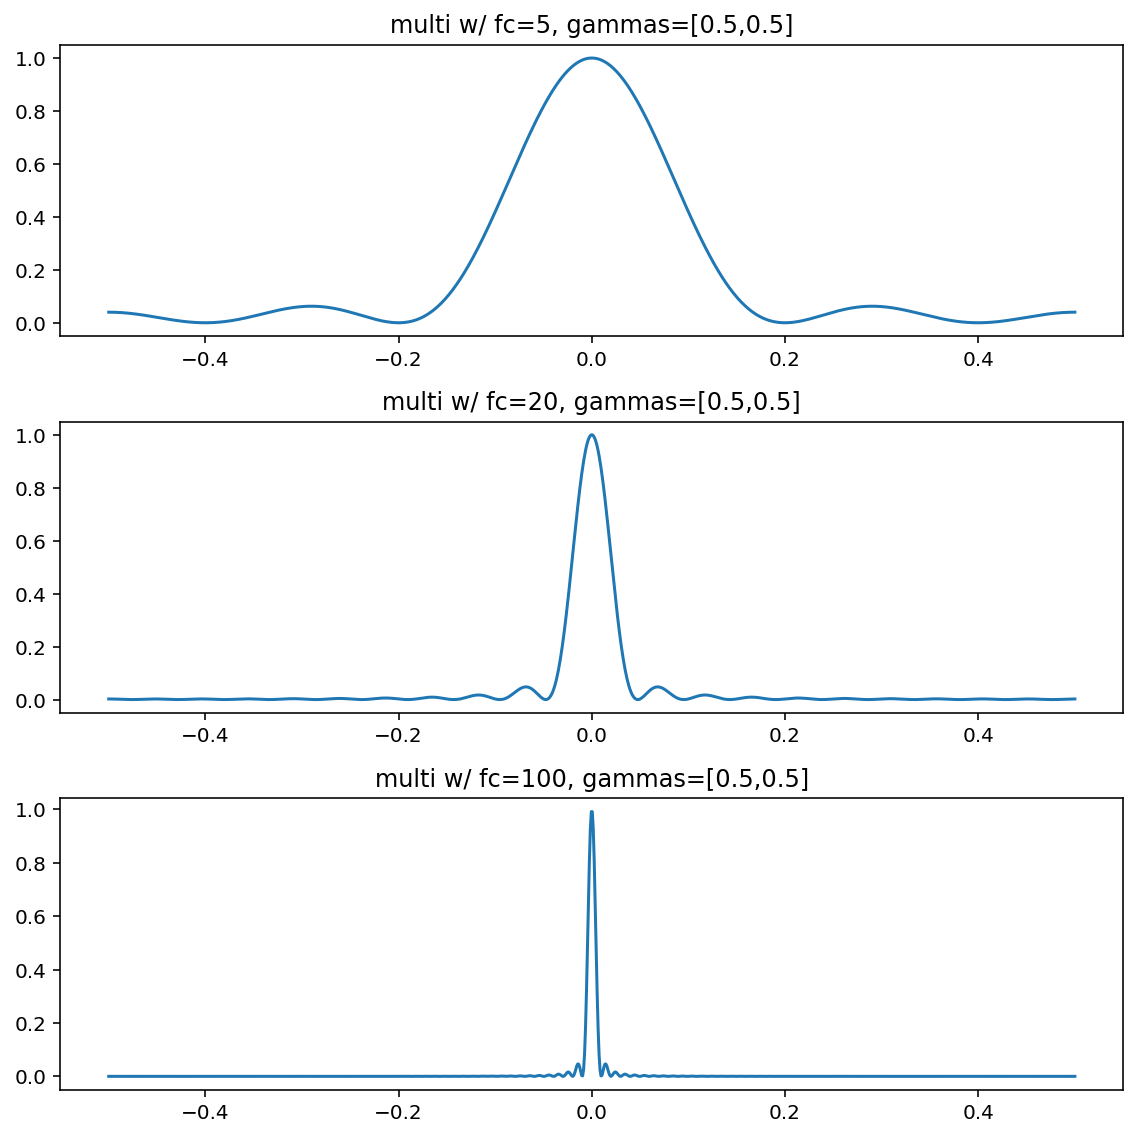

In [4]:
fig, axs = plt.subplots(3, 1, figsize=(8, 8))
fig.set_tight_layout(True)
for i, fc in enumerate([5, 20, 100]):
    axs[i].plot(t, np.abs(TrigPoly.multi_dirichlet(fc, [0.5, 0.5]).eval(t)))
    axs[i].set_title(f"multi w/ fc={fc}, gammas=[0.5,0.5]")

### Experiment with pairs of gammas

In [5]:
GAMMA_1S = [10 ** -4, 10 ** -3, 10 ** -2, 10 ** -1, 0.2, 0.3, 0.4, 0.5]
gammas = [(g, 1 - g) for g in GAMMA_1S]

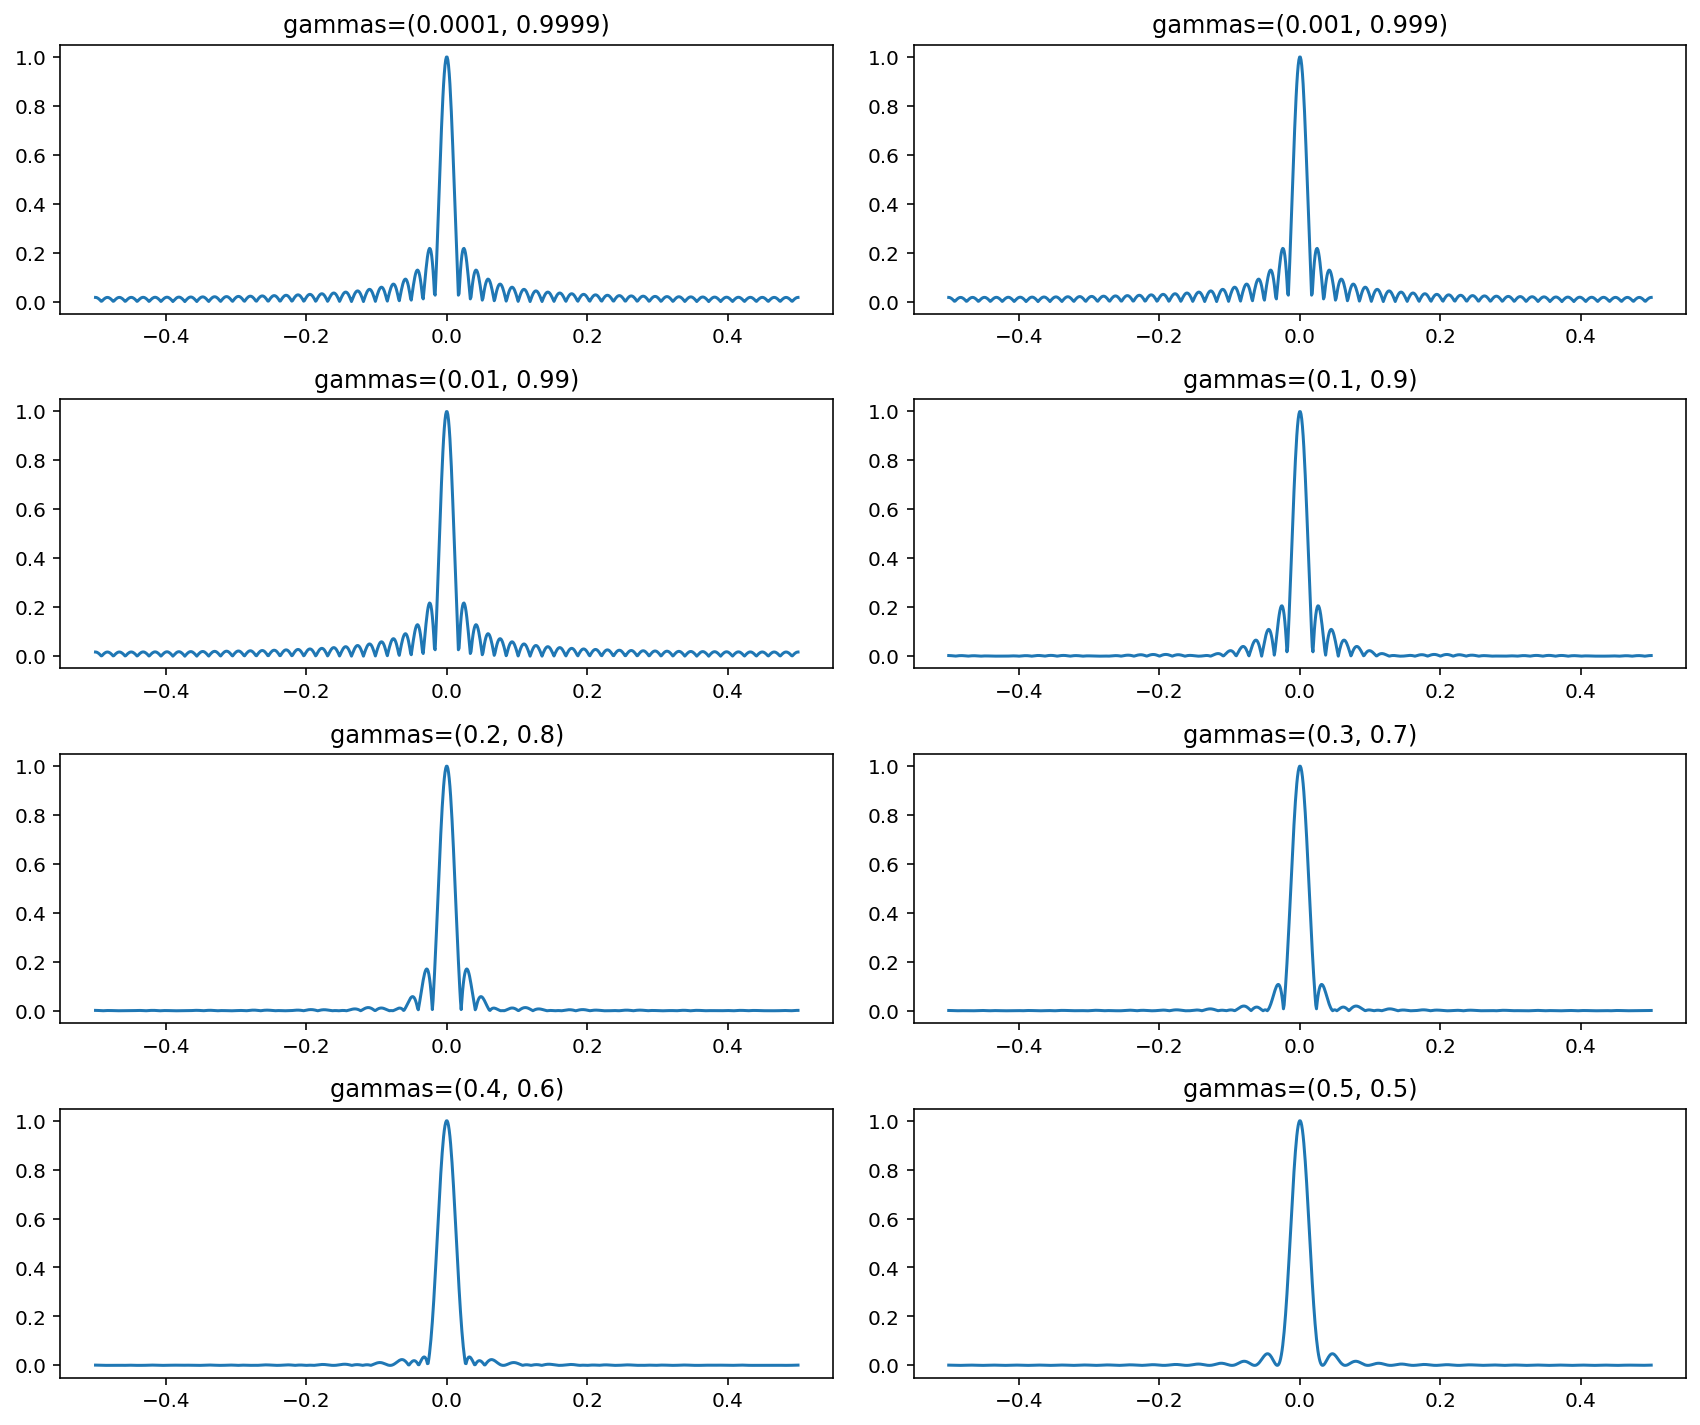

In [6]:
fig, axs = plt.subplots(4, 2, figsize=(12, 10))
fig.set_tight_layout(True)
for i in range(8):
    axs.flatten()[i].plot(t, np.abs(TrigPoly.multi_dirichlet(30, gammas[i]).eval(t)))
    axs.flatten()[i].set_title(f"gammas={gammas[i]}")

In [7]:
# from Kernel Matrix Analysis notebook
def kernel_matrix(kernel, support):
    shifted_supports = np.outer(np.ones(N), support) - np.outer(support, np.ones(N))
    return kernel.eval(shifted_supports).real

### Visualize kernel matrices for multidirichlet kernels with different gamma pairs

#### min_sep = 0.9 / FC

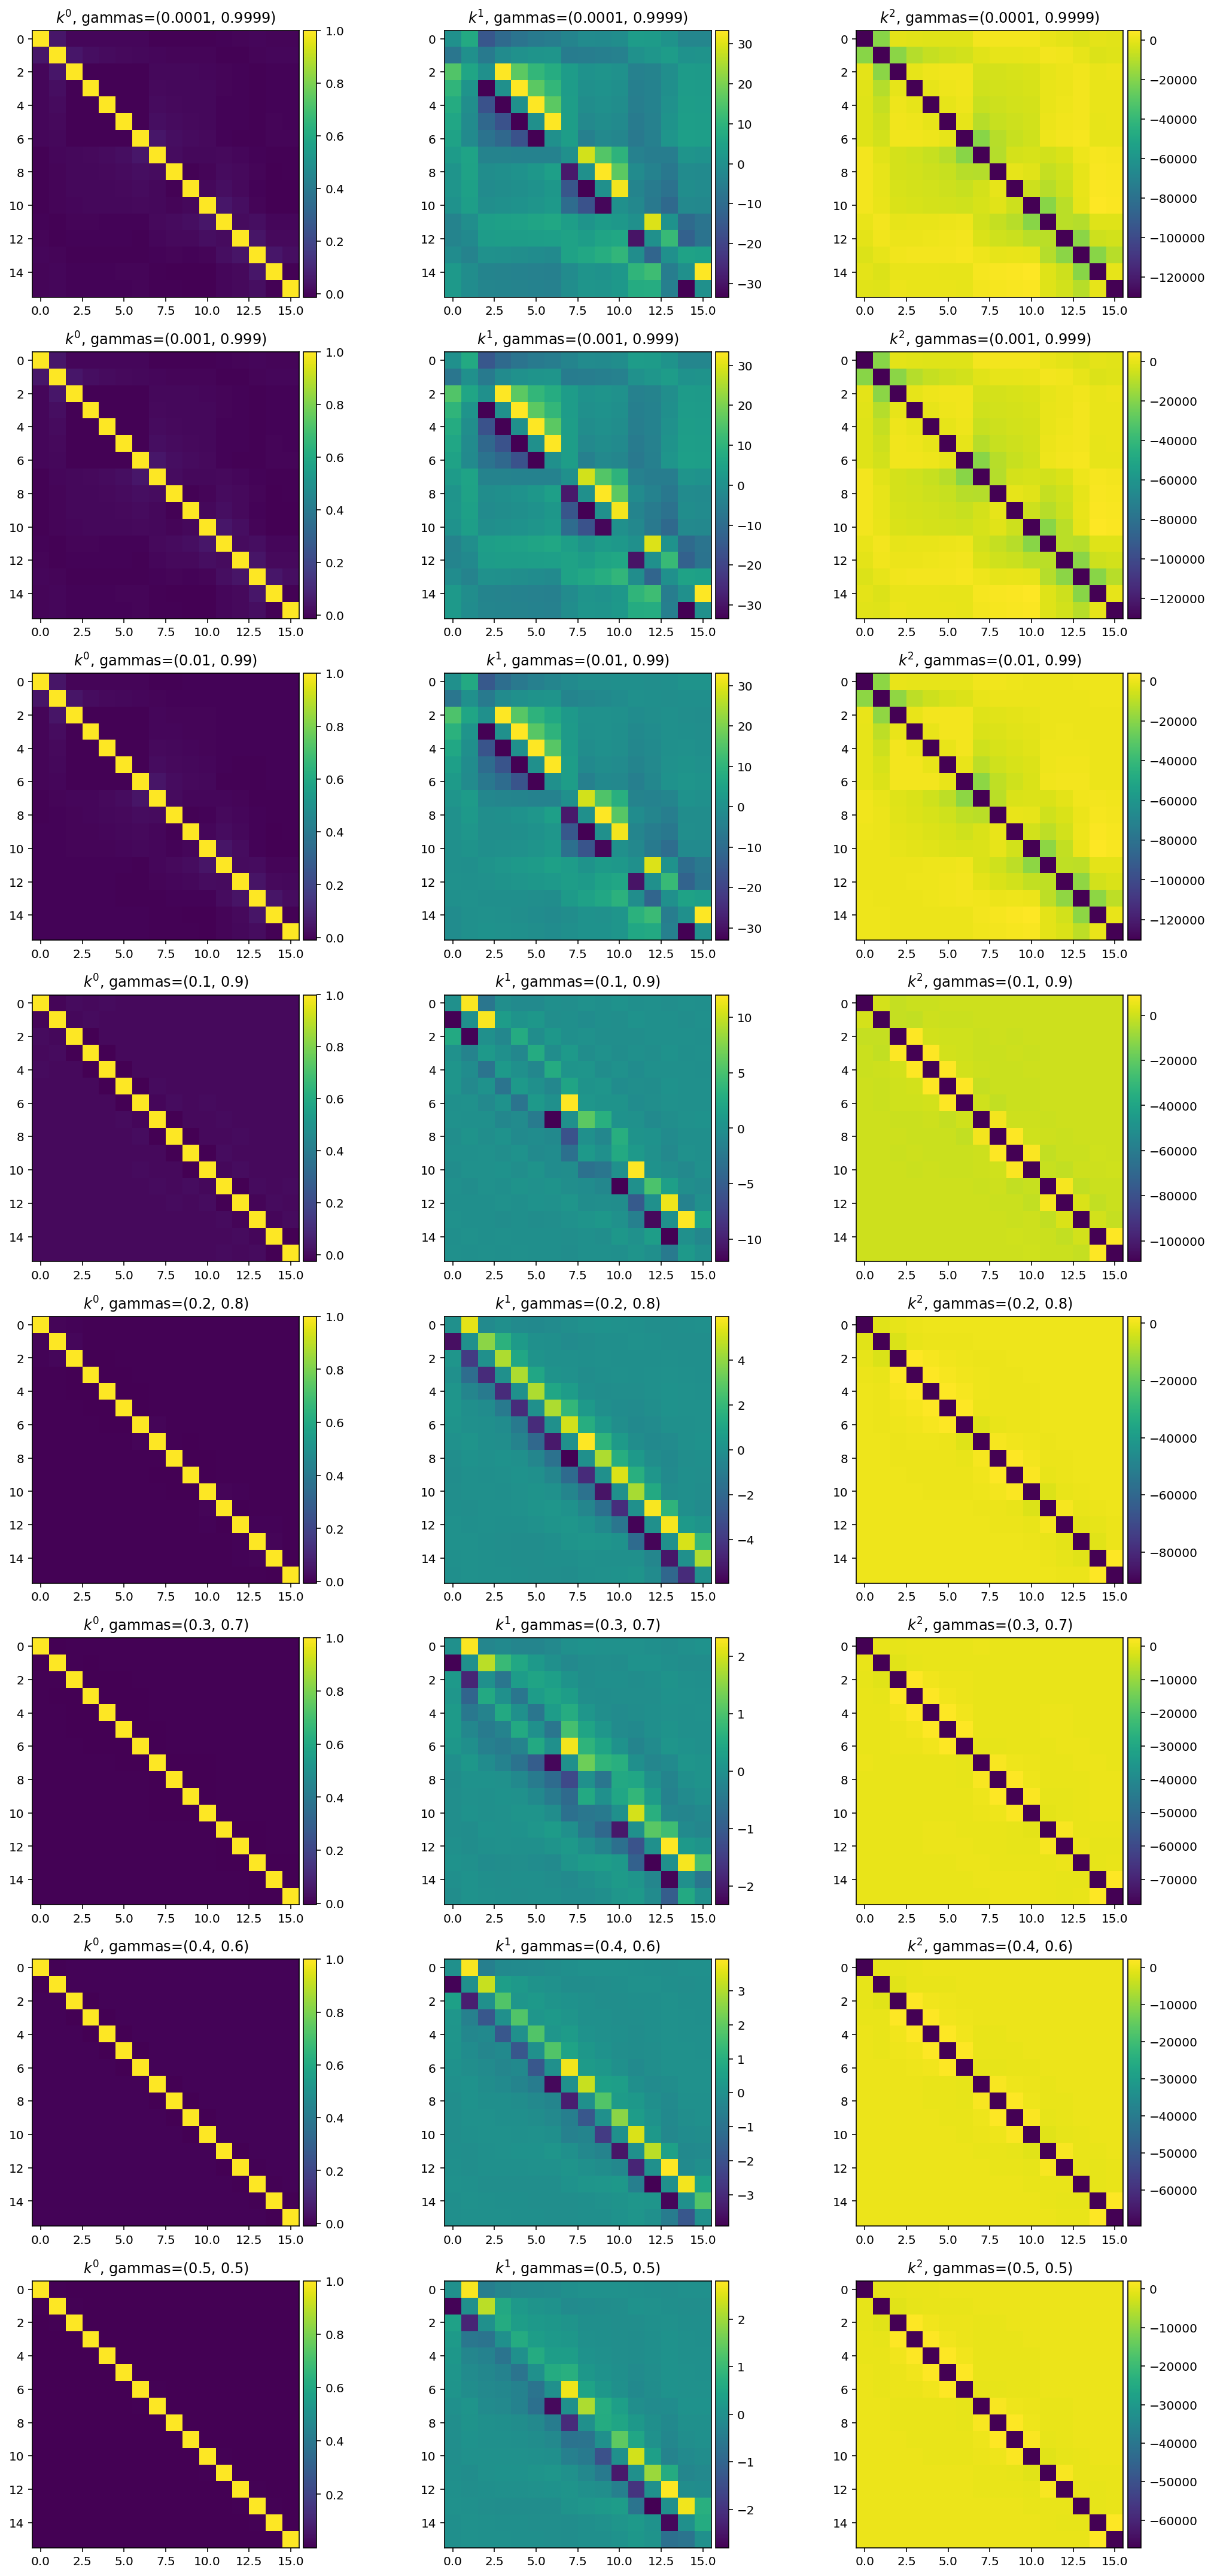

In [8]:
# adapted from Kernel Matrix Analysis notebook
FC = 30
COEF = 0.9

min_separation = COEF / FC
N = int(0.5 / min_separation)
support = jittered_supports(N, min_separation=min_separation)

fig, axs = plt.subplots(8, 3, figsize=(15, 30))
fig.set_tight_layout(True)
for i in range(8):
    kernel = TrigPoly.multi_dirichlet(fc, gammas[i])
    K0 = kernel_matrix(kernel, support)
    K1 = kernel_matrix(kernel.derivative(), support)
    K2 = kernel_matrix(kernel.derivative().derivative(), support)

    for j in [0, 1, 2]:
        im = axs[i, j].imshow([K0, K1, K2][j])
        axs[i, j].set_title(f"$k^{j}$, gammas={gammas[i]}")
        divider = make_axes_locatable(axs[i, j])
        cax = divider.append_axes("right", size="5%", pad=0.05)
        fig.colorbar(im, cax=cax, orientation="vertical")

#### min_sep = 0.55 / FC

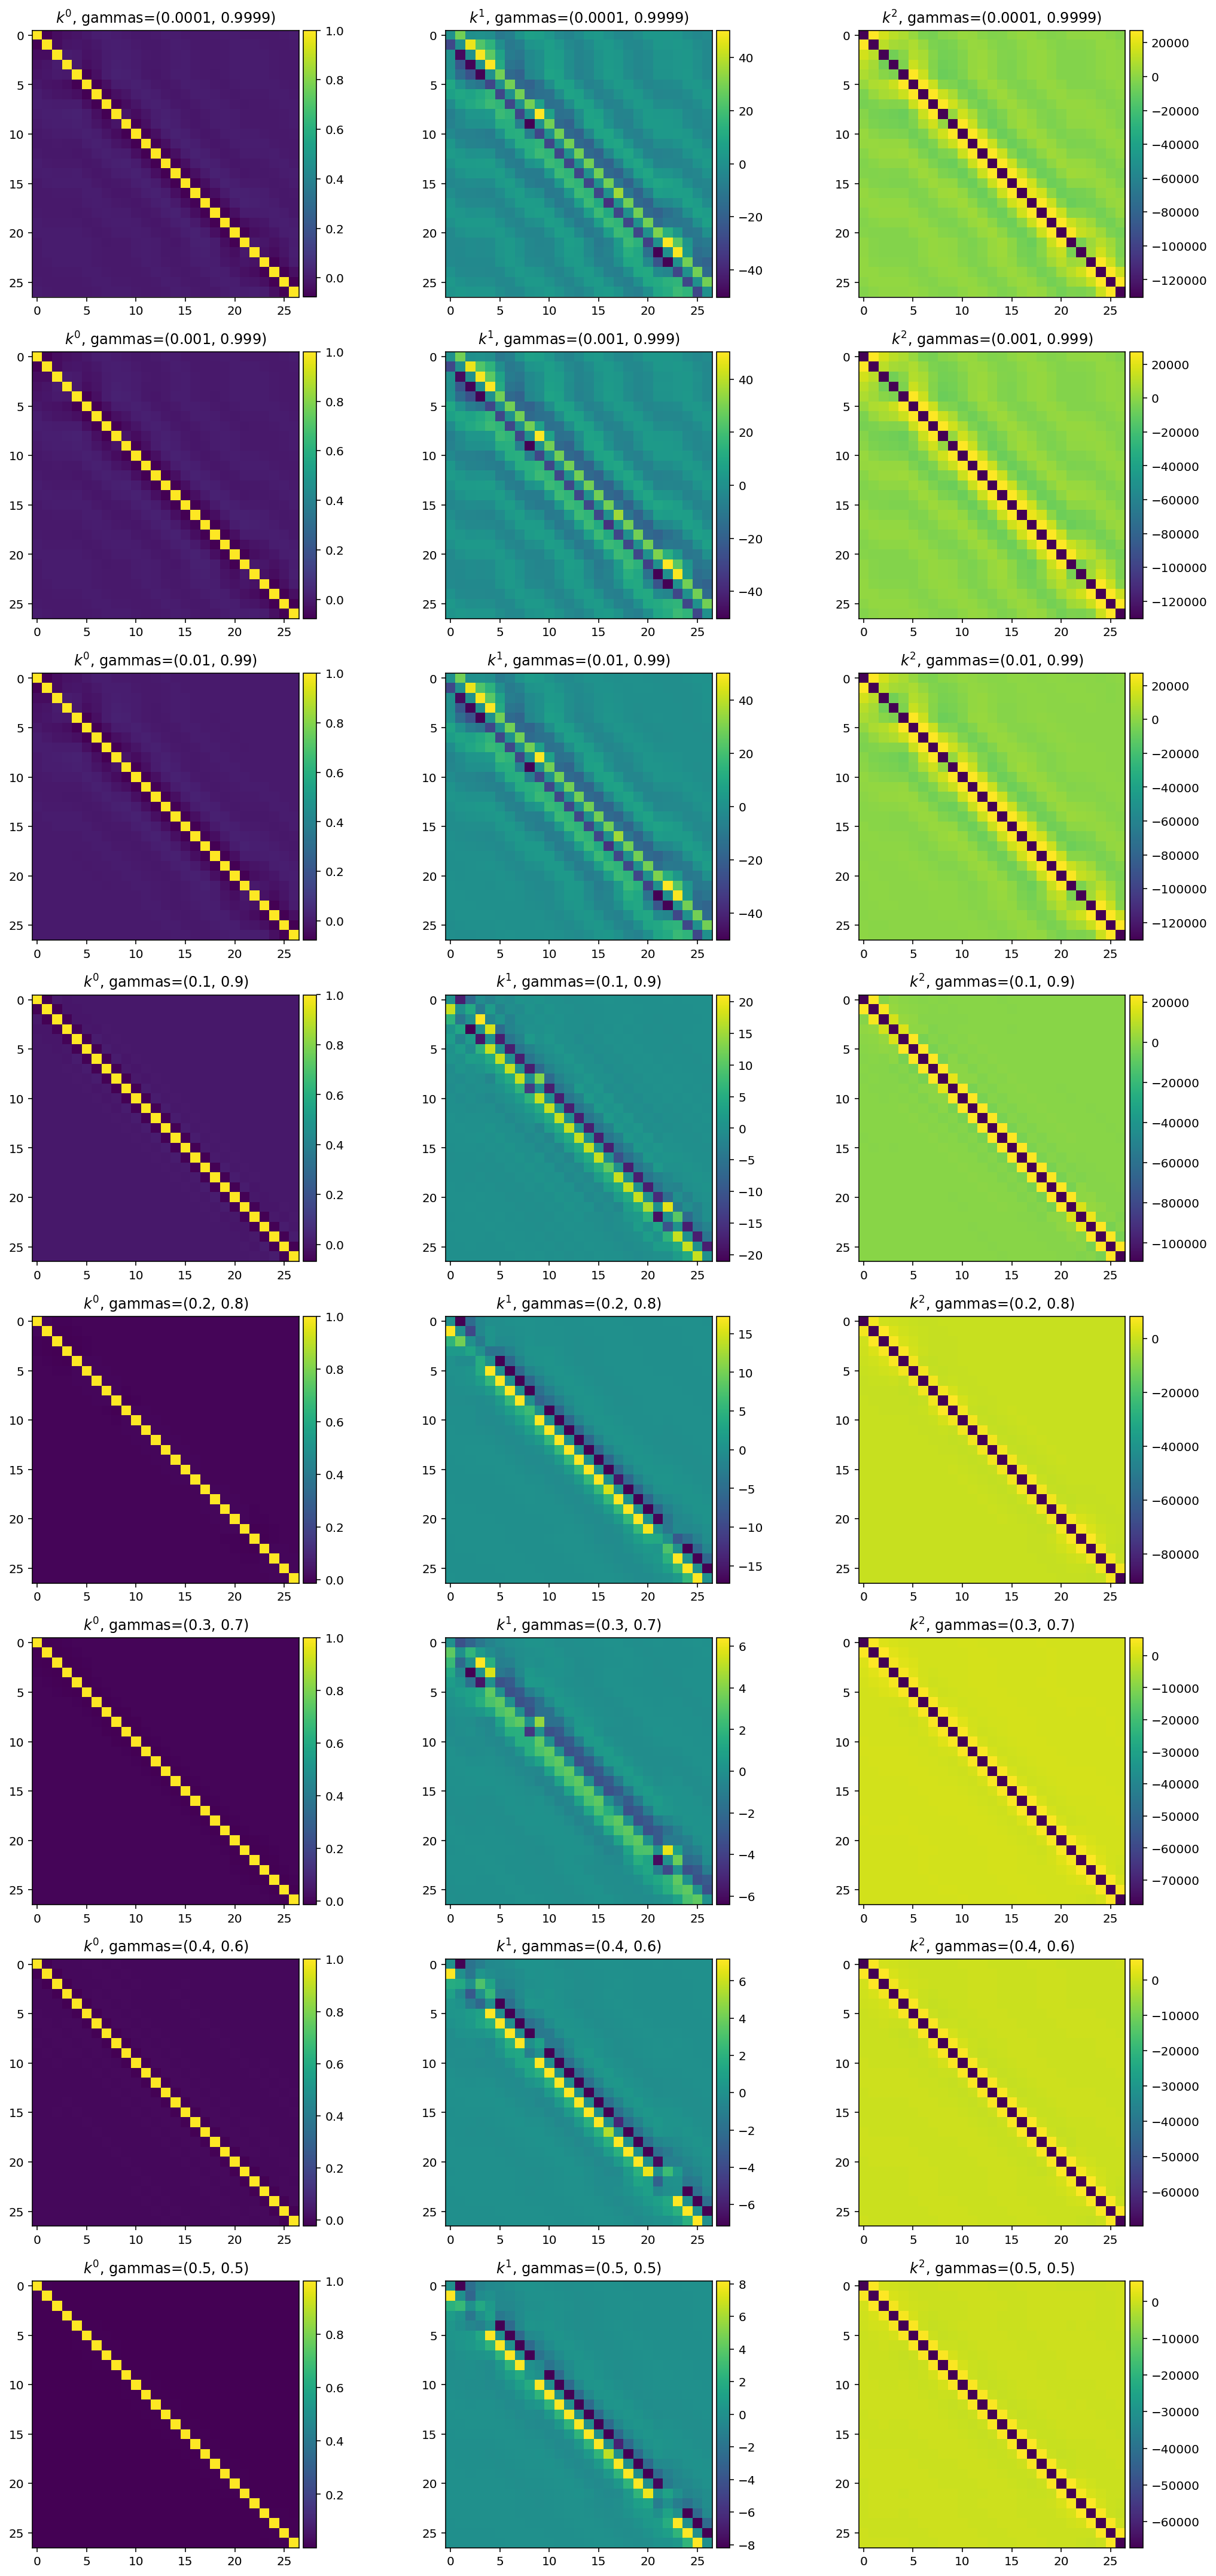

In [9]:
# adapted from Kernel Matrix Analysis notebook
FC = 30
COEF = 0.55

min_separation = COEF / FC
N = int(0.5 / min_separation)
support = jittered_supports(N, min_separation=min_separation)

fig, axs = plt.subplots(8, 3, figsize=(15, 30))
fig.set_tight_layout(True)
for i in range(8):
    kernel = TrigPoly.multi_dirichlet(fc, gammas[i])
    K0 = kernel_matrix(kernel, support)
    K1 = kernel_matrix(kernel.derivative(), support)
    K2 = kernel_matrix(kernel.derivative().derivative(), support)

    for j in [0, 1, 2]:
        im = axs[i, j].imshow([K0, K1, K2][j])
        axs[i, j].set_title(f"$k^{j}$, gammas={gammas[i]}")
        divider = make_axes_locatable(axs[i, j])
        cax = divider.append_axes("right", size="5%", pad=0.05)
        fig.colorbar(im, cax=cax, orientation="vertical")

#### min_sep = 0.45 / FC

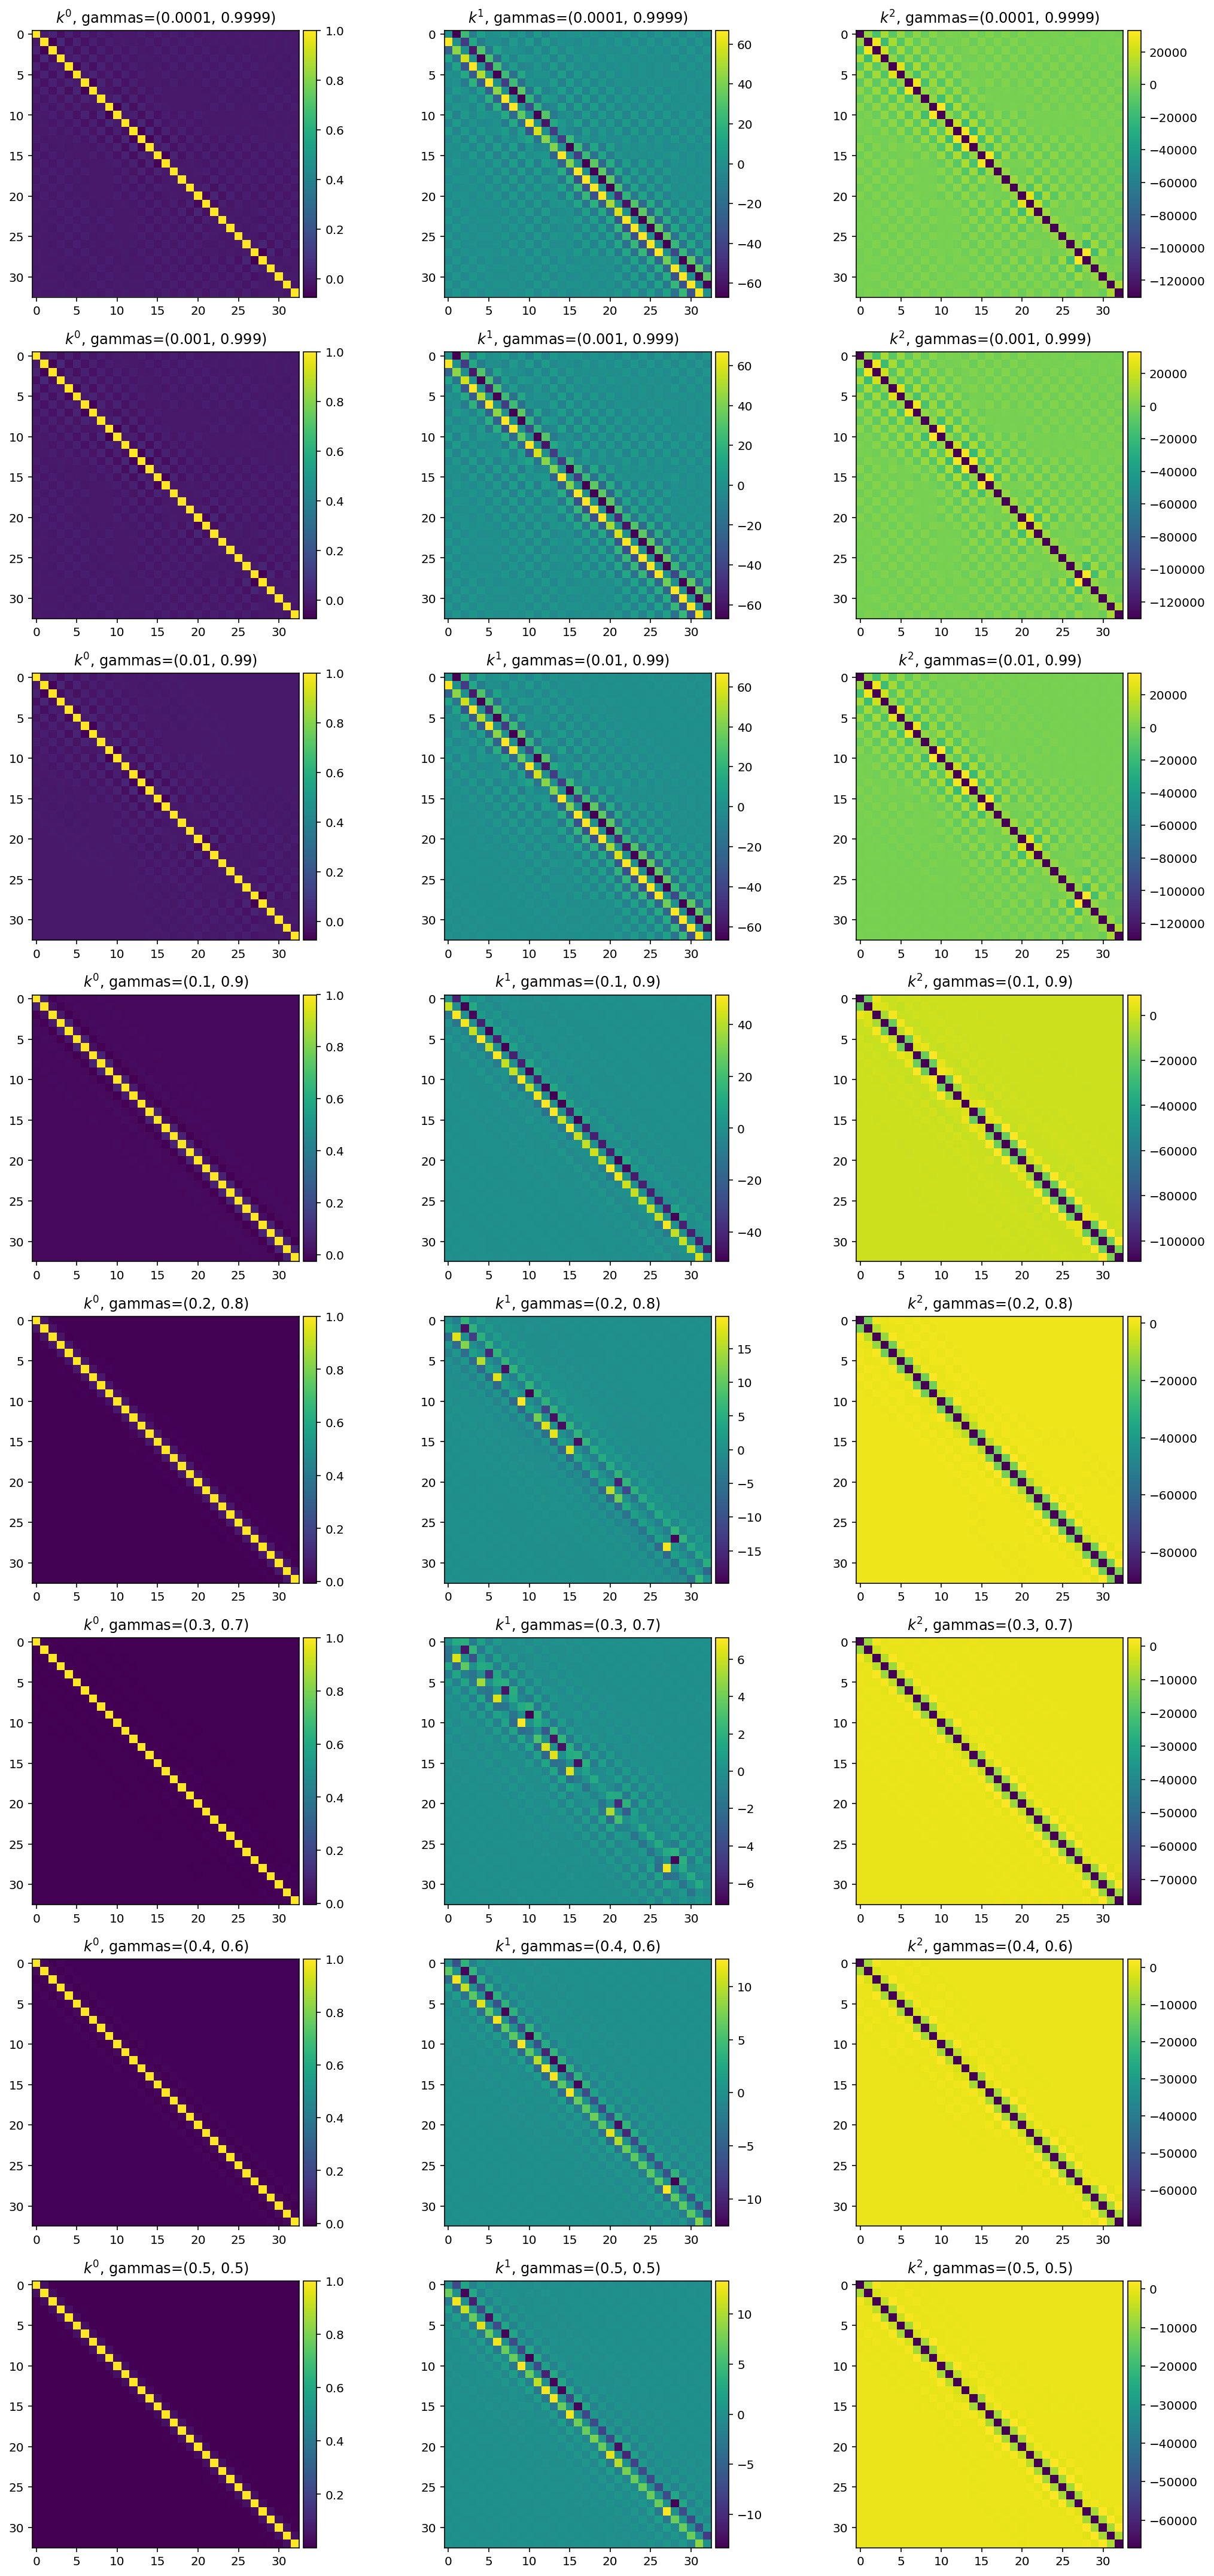

In [10]:
# adapted from Kernel Matrix Analysis notebook
FC = 30
COEF = 0.45

min_separation = COEF / FC
N = int(0.5 / min_separation)
support = jittered_supports(N, min_separation=min_separation)

fig, axs = plt.subplots(8, 3, figsize=(15, 30))
fig.set_tight_layout(True)
for i in range(8):
    kernel = TrigPoly.multi_dirichlet(fc, gammas[i])
    K0 = kernel_matrix(kernel, support)
    K1 = kernel_matrix(kernel.derivative(), support)
    K2 = kernel_matrix(kernel.derivative().derivative(), support)

    for j in [0, 1, 2]:
        im = axs[i, j].imshow([K0, K1, K2][j])
        axs[i, j].set_title(f"$k^{j}$, gammas={gammas[i]}")
        divider = make_axes_locatable(axs[i, j])
        cax = divider.append_axes("right", size="5%", pad=0.05)
        fig.colorbar(im, cax=cax, orientation="vertical")

### Next step: how small do eigenvalues get for each K0, and what are L-infinity norms of $K_0^{-1}k_0(t)$ and $K_0^{-1}K_1$

### Eigenvalues of $K_0$—don't want these to get too small

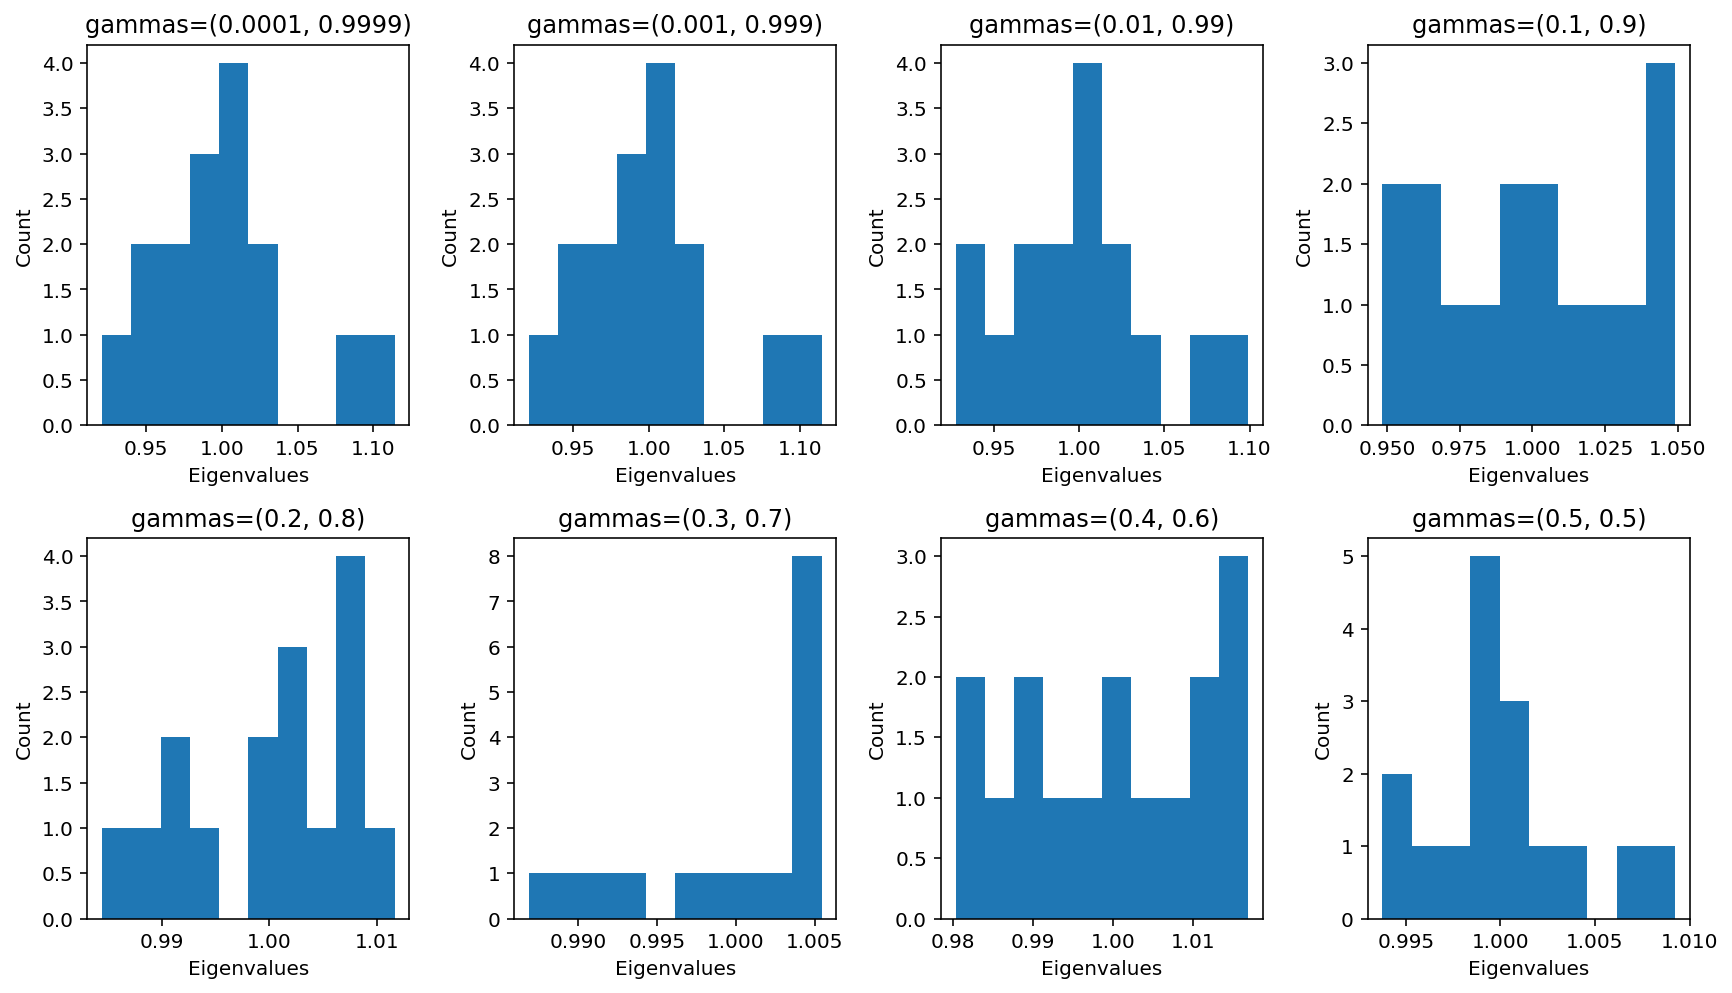

In [15]:
FC = 30
COEF = 0.9

min_separation = COEF / FC
N = int(0.5 / min_separation)
support = jittered_supports(N, min_separation=min_separation)

fig, axs = plt.subplots(2, 4, figsize=(12, 7))
fig.set_tight_layout(True)
for i in range(8):
    kernel = TrigPoly.multi_dirichlet(fc, gammas[i])
    K0 = kernel_matrix(kernel, support)
    val, vec = np.linalg.eig(K0)
    eigenval = abs(val)
    axs.flatten()[i].hist(eigenval)
    axs.flatten()[i].set_title(f"gammas={gammas[i]}")
    axs.flatten()[i].set_xlabel("Eigenvalues")
    axs.flatten()[i].set_ylabel("Count")

### $L_{\infty}$ norms of $K_0^{-1}K_1$, don't want these too high

Gammas: (0.0001, 0.9999) 629424.2345512321
Gammas: (0.001, 0.999) 629424.2345512321
Gammas: (0.01, 0.99) 629424.2345512321
Gammas: (0.1, 0.9) 976367.9389881485
Gammas: (0.2, 0.8) 400740.798722546
Gammas: (0.3, 0.7) 679213.3612609764
Gammas: (0.4, 0.6) 32303001.876637354
Gammas: (0.5, 0.5) 25229582.73711361


Text(0, 0.5, '$L_{\\infty}$ norm of $K_0^{-1}K_1$')

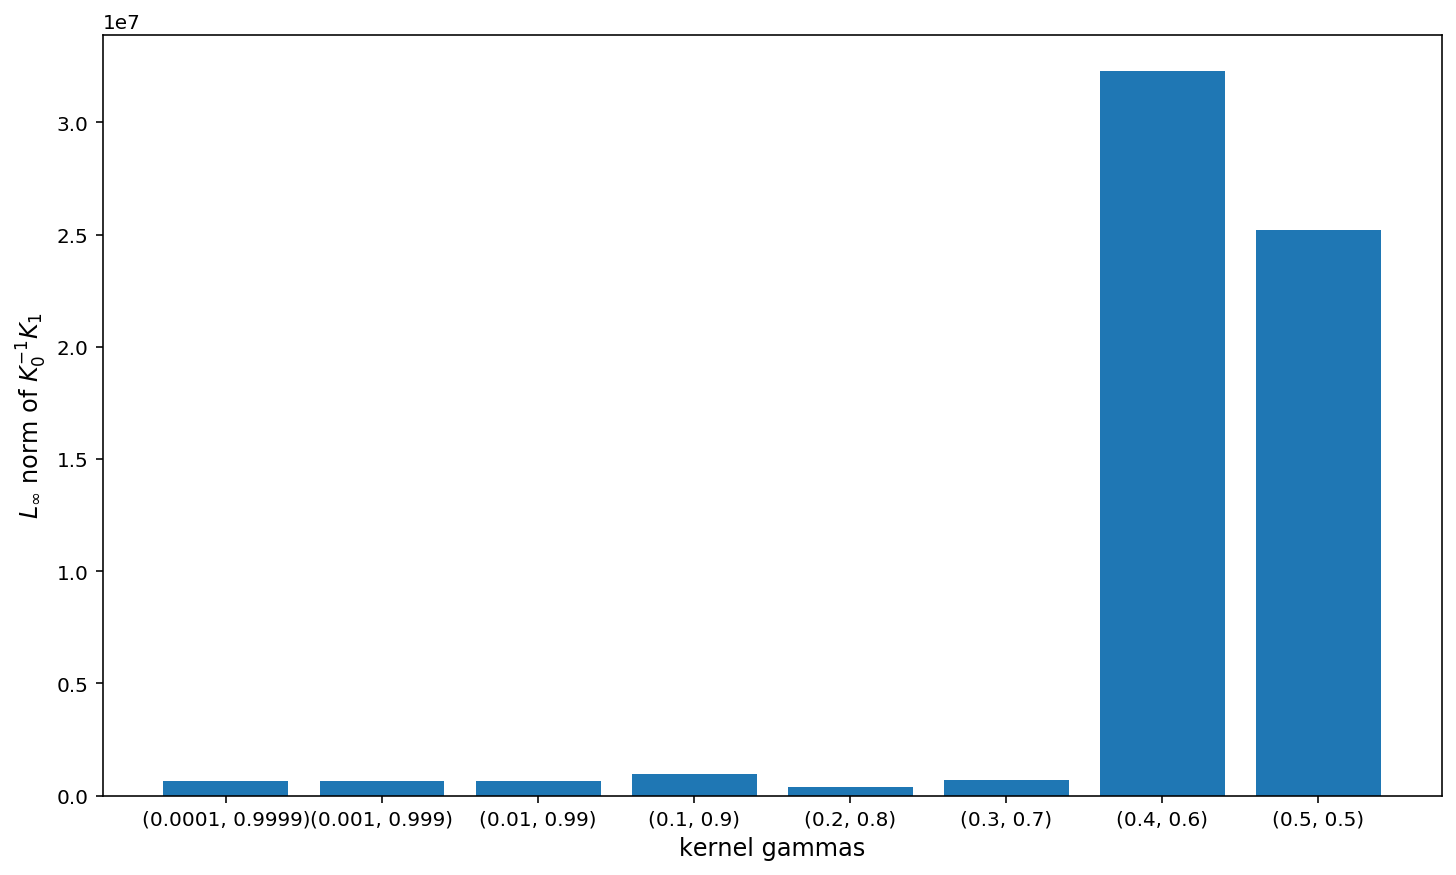

In [37]:
fc = 30
min_separation = 0.65 / (2.0 * fc + 1)
N = int(0.5 / min_separation)
support = jittered_supports(N, min_separation=min_separation)
norms = []
for i in range(8):
    kernel = TrigPoly.multi_dirichlet(fc, gammas[i])
    K0 = kernel_matrix(kernel, support)
    K1 = kernel_matrix(kernel.derivative(), support)
    norm = np.linalg.norm(np.linalg.solve(K0, K1), np.inf)
    norms.append(norm)
    print("Gammas:", gammas[i], norm)
fig, ax = plt.subplots(figsize=(12, 7))
ax.bar([str(gammas[i]) for i in range(len(gammas))], norms)
ax.set_xlabel("kernel gammas", size=12)
ax.set_ylabel("$L_{\infty}$ norm of $K_0^{-1}K_1$", size=12)

### $L_{\infty}$ norms of $K_0^{-1}k_0(t)$, don't want these too high

In [13]:
# todo
# pick values of t where it is a midpt between support points

TODO:

To start:
Pick 1 coordinate of $K_0^{-1}k_0(t)$ ($t$ is a midpt between supports) and plot this coordinate.

- it should be 1 at the first time point

Then fix min_sep:

- plot the full second term $D_{\beta}[k_1(t)-K_1K_0^{-1}k_0(t)]$ (and/or possibly the two inner terms separately). 
- It should be 0 at the first time point, but then what?
- are the two terms $k_1(t)$ and $K_1K_0^{-1}k_0(t)$ close to each other?
- is the difference way smaller than the first term?

### $L_{\infty}$ norms of $K_0^{-1}k_0(t)$ for first midpoint

In [22]:
def kernel_vector(kernel, t, support):
    t = np.repeat(t, N)
    shifted_supports = t - support
    return kernel.eval(shifted_supports).real

Gammas: (0.0001, 0.9999) 296.7214878371286
Gammas: (0.001, 0.999) 296.7214878371286
Gammas: (0.01, 0.99) 296.7214878371286
Gammas: (0.1, 0.9) 488.9339306544748
Gammas: (0.2, 0.8) 345.0201381975084
Gammas: (0.3, 0.7) 361.8937829934551
Gammas: (0.4, 0.6) 14393.838918472307
Gammas: (0.5, 0.5) 5875.565562767929


Text(0, 0.5, '$L_{\\infty}$ norm of $K_0^{-1}k_0(t)$')

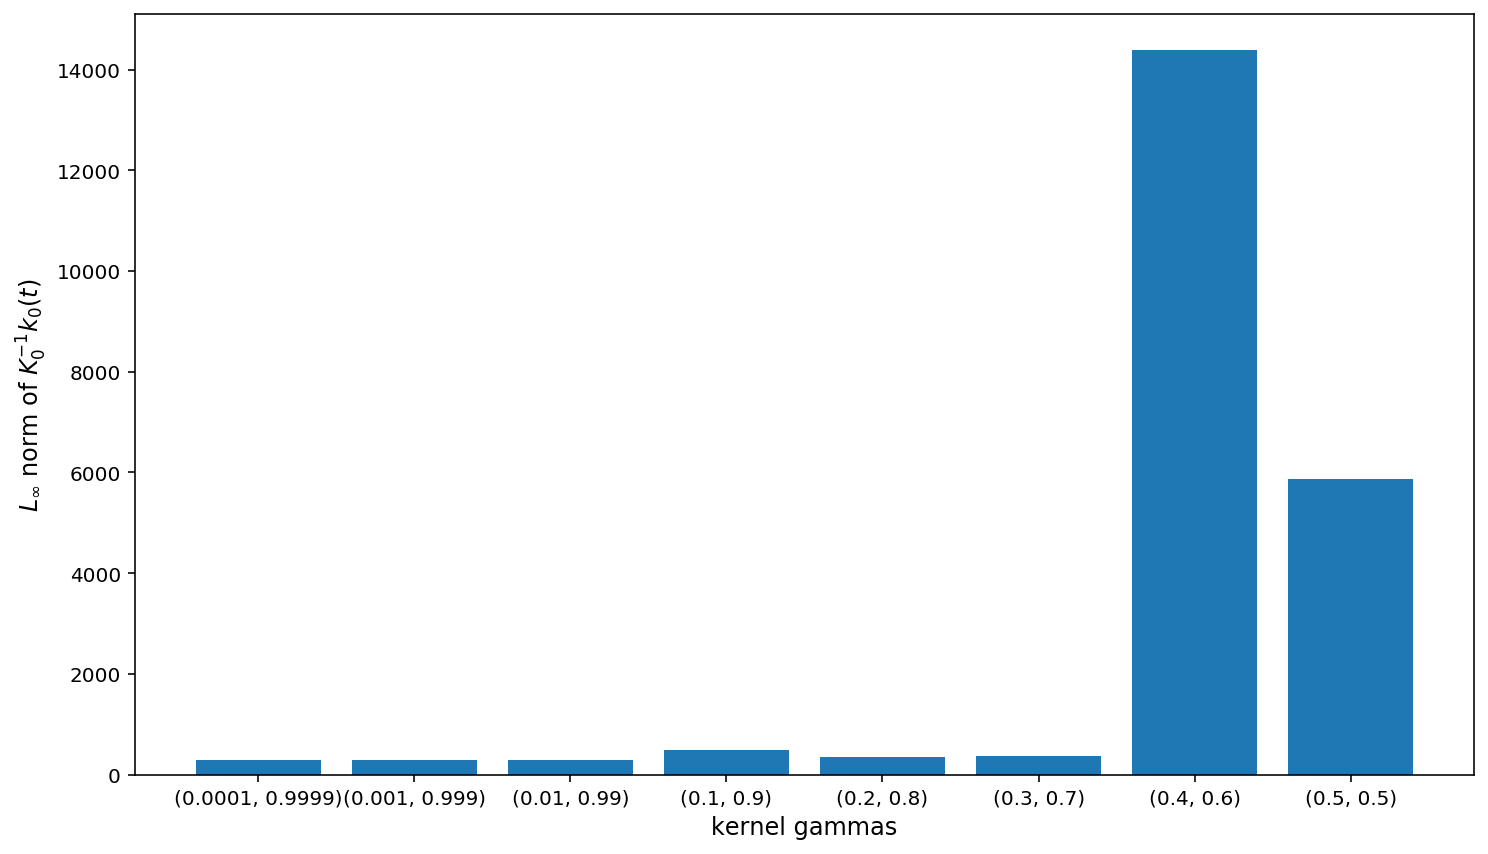

In [39]:
t = (support[0] + support[1]) / 2
norms = []
for i in range(8):
    kernel = TrigPoly.multi_dirichlet(fc, gammas[i])
    K0 = kernel_matrix(kernel, support)
    k0 = kernel_vector(kernel, t, support)
    norm = np.linalg.norm(np.linalg.solve(K0, k0), np.inf)
    norms.append(norm)
    print("Gammas:", gammas[i], norm)
fig, ax = plt.subplots(figsize=(12, 7))
ax.bar([str(gammas[i]) for i in range(len(gammas))], norms)
ax.set_xlabel("kernel gammas", size=12)
ax.set_ylabel("$L_{\infty}$ norm of $K_0^{-1}k_0(t)$", size=12)

### Plot the full second term $D_{\beta}[k_1(t)-K_1K_0^{-1}k_0(t)]$

Gammas: (0.0001, 0.9999) inf
Gammas: (0.001, 0.999) inf
Gammas: (0.01, 0.99) inf
Gammas: (0.1, 0.9) inf
Gammas: (0.2, 0.8) 434.3646375629341
Gammas: (0.3, 0.7) 567.5549247889023
Gammas: (0.4, 0.6) 30987.68114990874
Gammas: (0.5, 0.5) inf


<ipython-input-44-0c3d59471aa6>:10: RuntimeWarning: divide by zero encountered in true_divide
  beta = np.diag(np.linalg.solve(K0, K1)) / (


<BarContainer object of 8 artists>

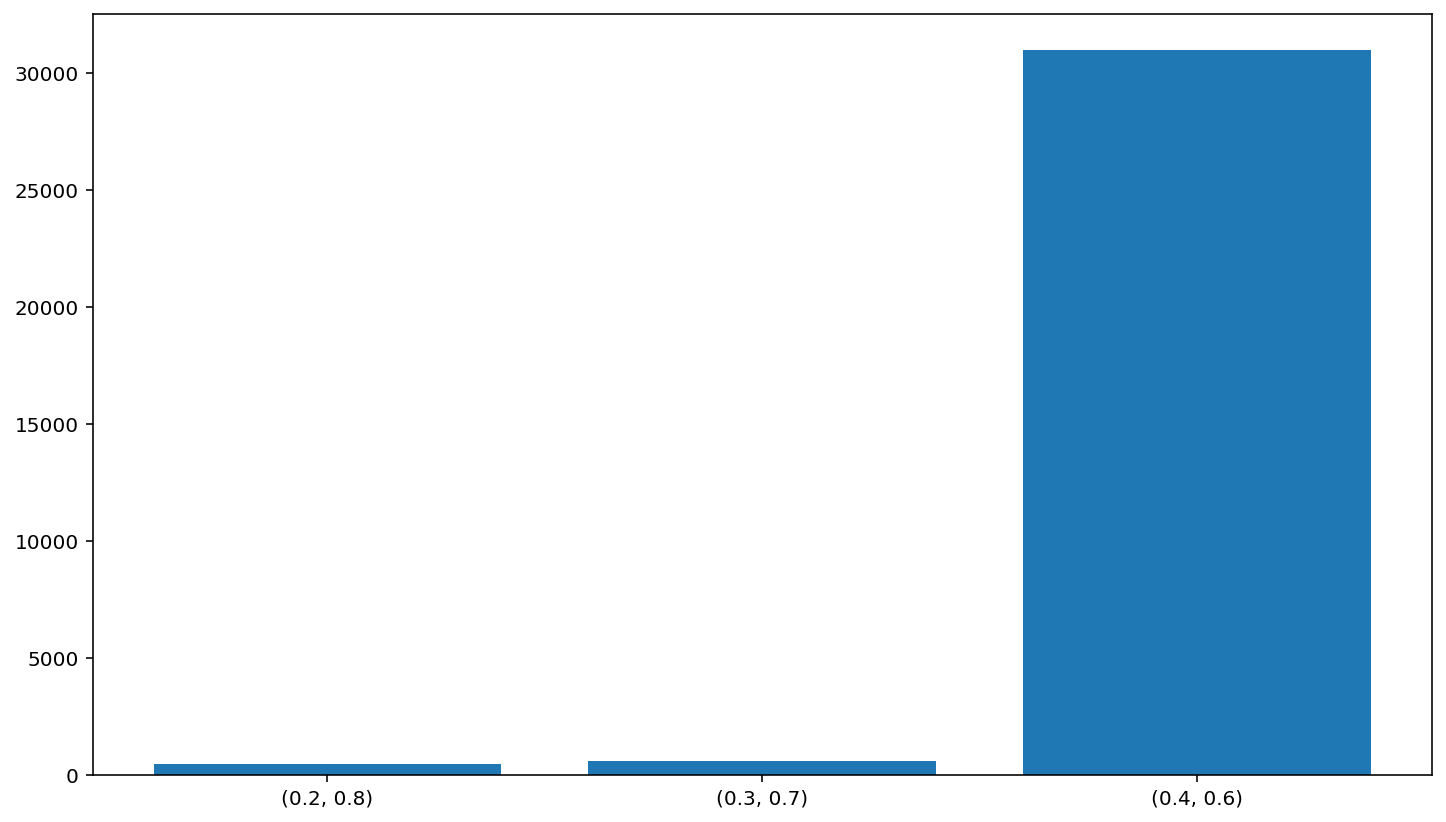

In [44]:
t = (support[0] + support[1]) / 2
norms = []
for i in range(8):
    kernel = TrigPoly.multi_dirichlet(fc, gammas[i])
    k0 = kernel_vector(kernel, t, support)
    k1 = kernel_vector(kernel.derivative(), t, support)
    K0 = kernel_matrix(kernel, support)
    K1 = kernel_matrix(kernel.derivative(), support)
    K2 = kernel_matrix(kernel.derivative().derivative(), support)
    beta = np.diag(np.linalg.solve(K0, K1)) / (
        np.diag(K2) - np.diag(np.matmul(K1, np.linalg.solve(K0, K1)))
    )
    d_beta = np.zeros((N, N), float)
    np.fill_diagonal(d_beta, beta)
    second_term = np.matmul(d_beta, k1 - np.matmul(K1, np.linalg.solve(K0, k0)))
    norm = np.linalg.norm(second_term, np.inf)
    norms.append(norm)
    print("Gammas:", gammas[i], norm)
fig, ax = plt.subplots(figsize=(12, 7))
ax.bar([str(gammas[i]) for i in range(len(gammas))], norms)

### Are the two terms $k_1(t)$ and $K_1K_0^{-1}k_0(t)$ close to each other?

Gammas: (0.0001, 0.9999) 1.5787659535249077e-06
Gammas: (0.001, 0.999) 1.5787659535249077e-06
Gammas: (0.01, 0.99) 1.5787659535249077e-06
Gammas: (0.1, 0.9) 1.5207811543405114e-06
Gammas: (0.2, 0.8) 1.967198890895361e-06
Gammas: (0.3, 0.7) 1.7680934902841727e-06
Gammas: (0.4, 0.6) 2.205176834024769e-05
Gammas: (0.5, 0.5) 3.4190890758623027e-06


<BarContainer object of 8 artists>

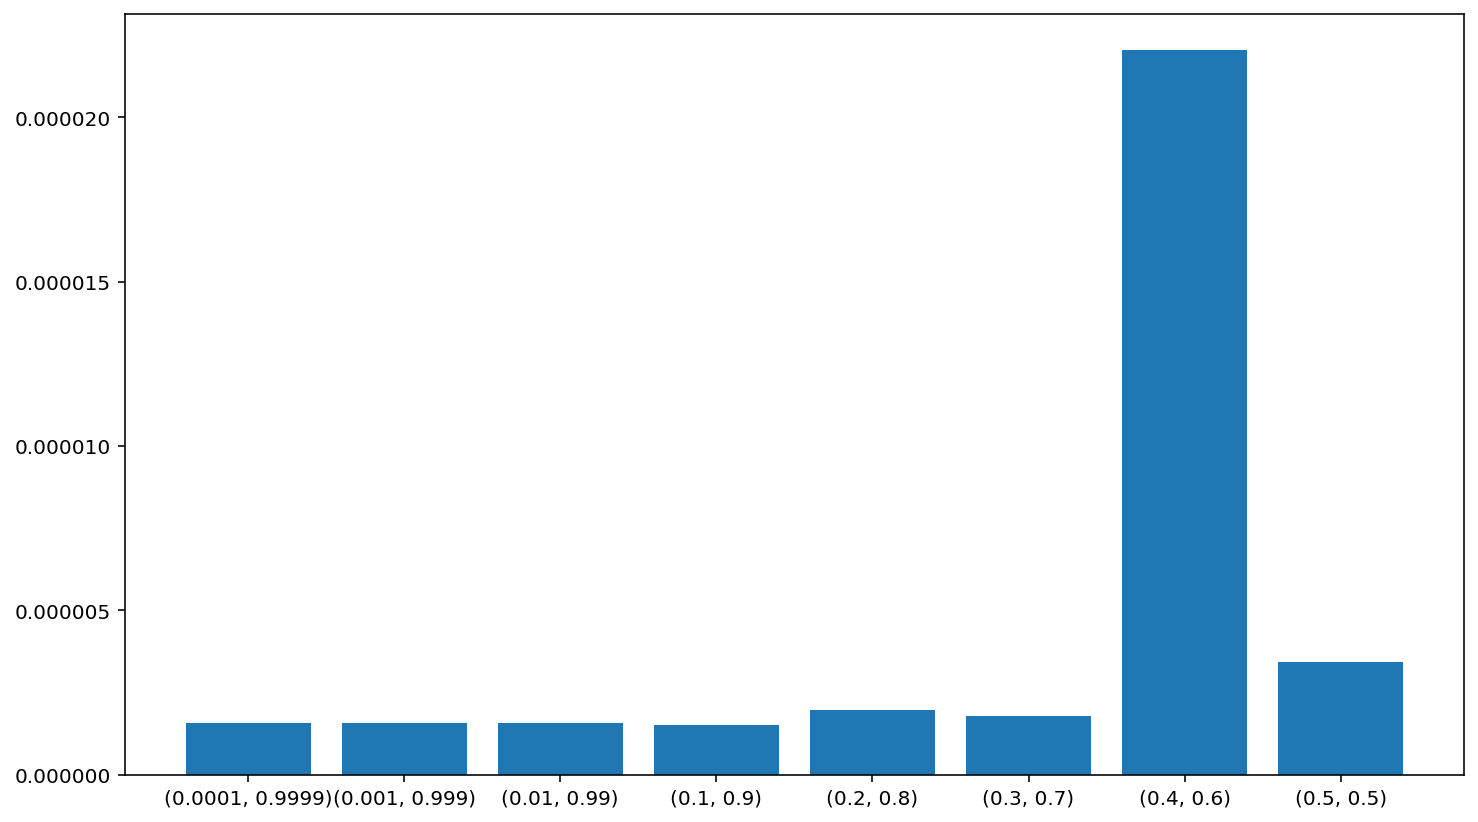

In [45]:
t = (support[0] + support[1]) / 2
norms = []
for i in range(8):
    kernel = TrigPoly.multi_dirichlet(fc, gammas[i])
    k0 = kernel_vector(kernel, t, support)
    k1 = kernel_vector(kernel.derivative(), t, support)
    K0 = kernel_matrix(kernel, support)
    K1 = kernel_matrix(kernel.derivative(), support)
    norm = np.linalg.norm(k1 - np.matmul(K1, np.linalg.solve(K0, k0)), np.inf)
    norms.append(norm)
    print("Gammas:", gammas[i], norm)
fig, ax = plt.subplots(figsize=(12, 7))
ax.bar([str(gammas[i]) for i in range(len(gammas))], norms)

### Is the difference way smaller than the first term?

Gammas: (0.0001, 0.9999) 296.7214878371286 1.5787659535249077e-06
Gammas: (0.001, 0.999) 296.7214878371286 1.5787659535249077e-06
Gammas: (0.01, 0.99) 296.7214878371286 1.5787659535249077e-06
Gammas: (0.1, 0.9) 488.9339306544748 1.5207811543405114e-06
Gammas: (0.2, 0.8) 345.0201381975084 1.967198890895361e-06
Gammas: (0.3, 0.7) 361.8937829934551 1.7680934902841727e-06
Gammas: (0.4, 0.6) 14393.838918472307 2.205176834024769e-05
Gammas: (0.5, 0.5) 5875.565562767929 3.4190890758623027e-06


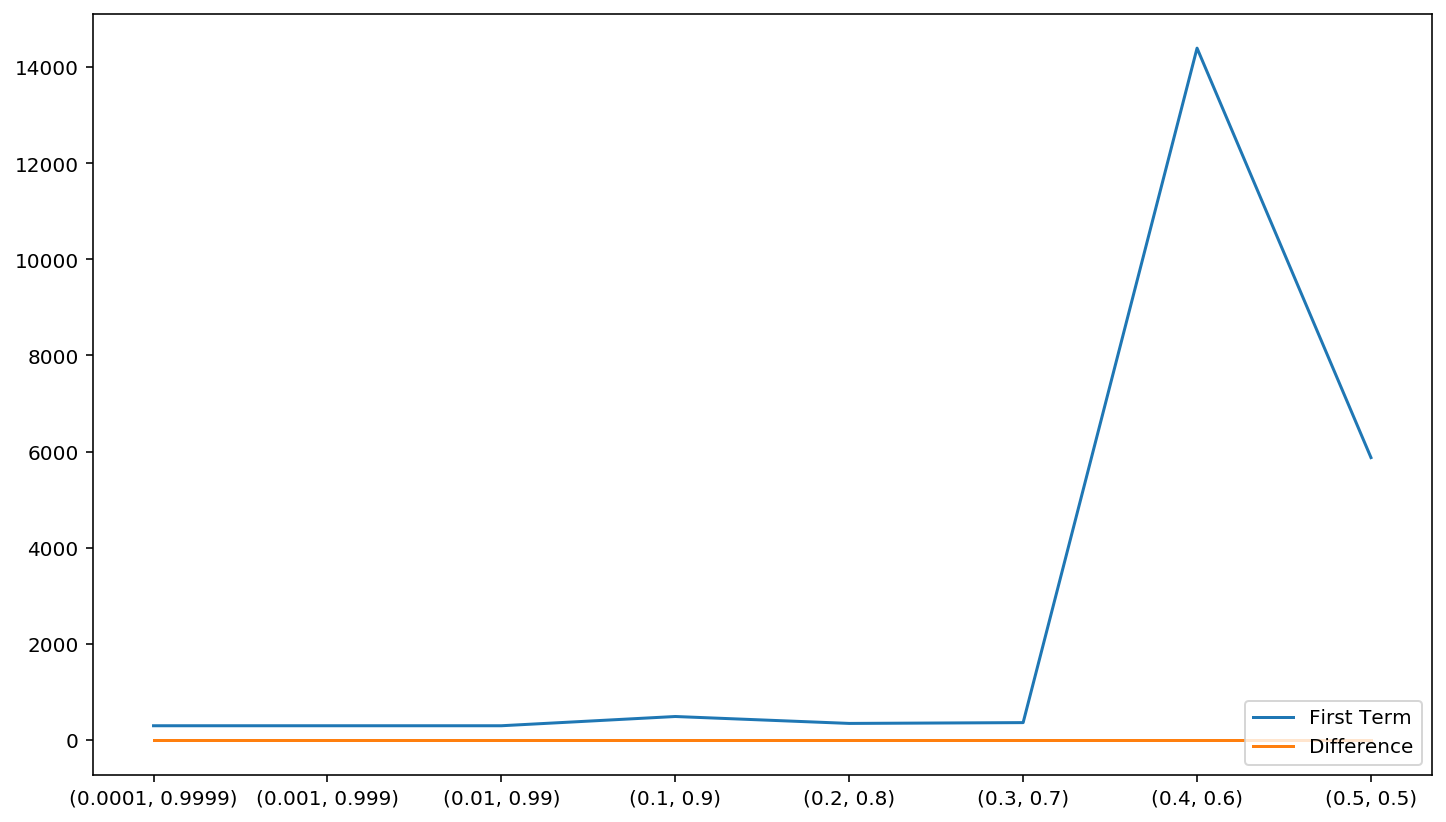

In [48]:
t = (support[0] + support[1]) / 2
norms_diff = []
norms_first = []
for i in range(8):
    kernel = TrigPoly.multi_dirichlet(fc, gammas[i])
    k0 = kernel_vector(kernel, t, support)
    k1 = kernel_vector(kernel.derivative(), t, support)
    K0 = kernel_matrix(kernel, support)
    K1 = kernel_matrix(kernel.derivative(), support)
    norm_diff = np.linalg.norm(k1 - np.matmul(K1, np.linalg.solve(K0, k0)), np.inf)
    norm_first = np.linalg.norm(np.linalg.solve(K0, k0), np.inf)
    norms_diff.append(norm_diff)
    norms_first.append(norm_first)
    print("Gammas:", gammas[i], norm_first, norm_diff)
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot([str(gammas[i]) for i in range(len(gammas))], norms_first, label="First Term")
ax.plot([str(gammas[i]) for i in range(len(gammas))], norms_diff, label="Difference")
ax.legend(loc="lower right")